## Double Orbit Nb


In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [8]:
class DoubleOrbit():
    """
    DoubleOrbit class implements the parameters and differential equation for 
     two-body gravitational motion using the notation above.
     
    Parameters
    ----------
    m1 : float
        first bob's mass 
    m2 : float
        second bob's mass
    g : float
        value of gravitational constant 

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, m1=1., m2=1., G=1.):
        self.m1=m1
        self.m2=m2
        self.G=G
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = x_1(t)    = x1
            y[1] = y_1(t)    = y1
            y[2] = x_2(t)    = x2
            y[3] = y_2(t)    = y2
            y[4] = dx_1/dt(t)= u1
            y[5] = dy_1/dt(t)= v1
            y[6] = dx_2/dt(t)= u2
            y[7] = dy_2/dt(t)= v2
            
        Returns
        -------
        y_dot: float
            A 4-component vector with 
            y_dot[0] = dx_1/dt(t)= u1
            y_dot[1] = dy_1/dt(t)= v1
            y_dot[2] = dx_2/dt(t)= u2
            y_dot[3] = dy_2/dt(t)= v2  
            y_dot[4] = d^2 x_1/dt^2(t)
            y_dot[5] = d^2 y_1/dt^2(t)
            y_dot[6] = d^2 x_2/dt^2(t)
            y_dot[7] = d^2 y_2/dt^2(t) 
        
        """
        y_dot = [0. for i in range(8)]
        x1, y1, x2, y2, u1, v1, u2, v2 = y
        
        G = self.G
        m1 = self.m1
        m2 = self.m2

        x21 = x2-x1
        y21 = y2-y1
        
        denom = ((x21**2)+(y21**2))**(3./2.)
        
        # Do dphi_1/dt and dphi_2/dt first:
        y_dot[0:4] = y[4:8]
        
        # Now do d^2 x_{1,2}/dt^2(t) 
        y_dot[4]= G*m2*x21/denom
        y_dot[6]= -G*m1*x21/denom            
            
        # Finally do d^2 y_{1,2}/dt^2(t) 
        y_dot[5]= G*m2*y21/denom
        y_dot[7]= -G*m1*y21/denom
        
        return y_dot
    
    
    def solve_ode(self, t_pts, y_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [y_0[i] for i in range(len(y_0))] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        return solution.y
                    

In [9]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [20]:
# Labels for individual plot axes
x_vs_y_labels = (r'$x$', r'$y$')
deltax_vs_deltay = (r'$\dot x$', r'$\dot y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
m_1 = 5.
m_2 = 10.
G_val = 1.


# Instantiate a pendulum 
tp1 = DoubleOrbit(m1=m_1, m2 = m_2, G=G_val)

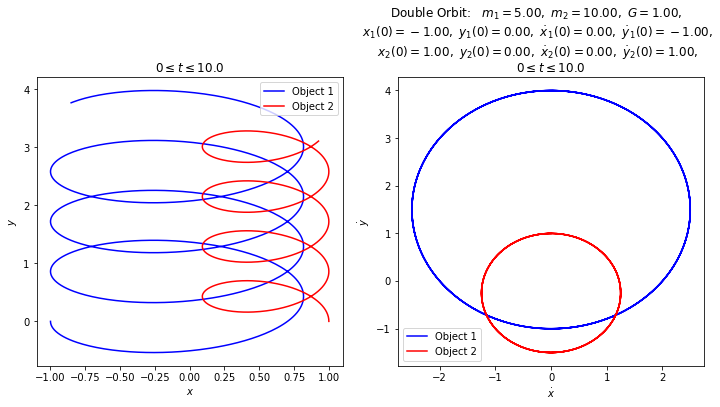

In [21]:
x1_0, y1_0 = -1., 0.
x2_0, y2_0 = 1., 0.
x1_dot_0, y1_dot_0 = 0., -1.
x2_dot_0, y2_dot_0 = 0., 1.

y_0 =[x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = tp1.solve_ode(t_pts, y_0)

# start the plot!
fig = plt.figure(figsize=(15,5))

overall_title = 'Double Orbit:  ' + \
                rf' $m_1 = {m_1:.2f},$' + \
                rf' $m_2 = {m_2:.2f},$' + \
                rf' $G = {G_val:.2f},$' + '\n' + \
                rf' $x_1(0) = {x1_0:.2f},$' + \
                rf' $y_1(0) = {y1_0:.2f},$' + \
                rf' $\dot x_1(0) = {x1_dot_0:.2f},$'+ \
                rf' $\dot y_1(0) = {y1_dot_0:.2f},$' + '\n' \
                rf' $x_2(0) = {x2_0:.2f},$' + \
                rf' $y_2(0) = {y2_0:.2f},$' + \
                rf' $\dot x_2(0) = {x2_dot_0:.2f},$' + \
                rf' $\dot y_2(0) = {y2_dot_0:.2f},$'
fig.suptitle(overall_title, va='baseline')

# first plot position: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            color='blue',
            label="Object 1",
            ax=ax_a)  
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label="Object 2", 
            title=rf'$0 \leq t \leq {t_end:.1f}$', 
            ax=ax_a)  

# second plot: state space plot from t=30 to t=50   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_dot[start : stop], y1_dot[start : stop], 
            color='blue',
            label="Object 1",
            ax=ax_b)  
plot_y_vs_x(x2_dot[start : stop], y2_dot[start : stop], 
            axis_labels=deltax_vs_deltay, 
            color='red',
            label="Object 2", 
            title=rf'$0 \leq t \leq {t_end:.1f}$', 
            ax=ax_b)  


"""# third plot: delta phi plot
ax_a = fig.add_subplot(1,3, 3)                  

start, stop = start_stop_indices(t_pts, 0., t_end)    
plot_y_vs_x(t_pts[start : stop], deltaPhi1[start : stop], 
            axis_labels=deltaphi_vs_time_labels, 
            color='blue',
            label=rf'$\Delta\Phi_1$', 
            semilogy=True,
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], deltaPhi2[start : stop], 
            axis_labels=deltaphi_vs_time_labels, 
            color='red',
            label=rf'$\Delta\Phi_2$', 
            semilogy=True,
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], deltaPhi3[start : stop], 
            axis_labels=deltaphi_vs_time_labels, 
            color='green',
            label=rf'$\Delta\Phi_3$', 
            semilogy=True,
            title=rf'$\Delta\phi={dPhi:.3f}, 0 \leq t \leq {t_end:.1f}$', 
            ax=ax_a)"""

fig.tight_layout()
fig.savefig('DoubleOrbit.png', bbox_inches='tight')  # always bbox_inches='tight'